![image](how.png)

**"Should I Stay or Should i Go (from the Hospital)"**

In [14]:
# Librerías básicas:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Genera todos los plot más grandes de todas las librerías
plt.rcParams["figure.figsize"] = (10,8)

# Librerías de todos los modelos 
from sklearn.linear_model import LogisticRegression
        # la otra forma, pero lo mismo: from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from pandas_profiling import ProfileReport

# progress bar 
from tqdm import tqdm
# Librerías 
import pickle


import warnings
warnings.filterwarnings('ignore')

In [31]:
# importar módulu.py    
import sys
sys.path.append("/Users/elsa/Desktop/Bootcamp The Bridge/The_Bridge/Ds_Bootcamp_Elsa/DS_Elsa/week10/day1/competition/utils")

In [33]:
sys.path

['/Users/elsa/Desktop/Bootcamp The Bridge/The_Bridge/Ds_Bootcamp_Elsa/Ejercicios/competicion_kaggle/archivos completados',
 '/',
 '/Users/elsa/.vscode/extensions/ms-python.python-2020.8.108011/pythonFiles',
 '/Users/elsa/.vscode/extensions/ms-python.python-2020.8.108011/pythonFiles/lib/python',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python38.zip',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/lib-dynload',
 '',
 '/Users/elsa/Library/Python/3.8/lib/python/site-packages',
 '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages',
 '/Users/elsa/Library/Python/3.8/lib/python/site-packages/IPython/extensions',
 '/Users/elsa/.ipython',
 '/Users/elsa/Desktop/Bootcamp The Bridge/The_Bridge/Ds_Bootcamp_Elsa/DS_Elsa/week10/day1/competition/utils/files.py',
 '/Users/elsa/Desktop/Bootcamp The Bridge/The_Bridge/Ds_Bootcamp_Elsa/DS_Elsa/week10/day1/competition/utils',
 '/Us

In [34]:
from files import rename_filename, file_exists

In [4]:
df = pd.read_csv("/Users/elsa/Desktop/Bootcamp The Bridge/The_Bridge/Ds_Bootcamp_Elsa/Ejercicios/competicion_kaggle/train_set.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       100000 non-null  int64  
 1   1       100000 non-null  int64  
 2   2       100000 non-null  object 
 3   3       100000 non-null  int64  
 4   4       100000 non-null  object 
 5   5       100000 non-null  int64  
 6   6       100000 non-null  object 
 7   7       100000 non-null  object 
 8   8       100000 non-null  object 
 9   9       99967 non-null   float64
 10  10      100000 non-null  int64  
 11  11      98517 non-null   float64
 12  12      100000 non-null  object 
 13  13      100000 non-null  object 
 14  14      100000 non-null  int64  
 15  15      100000 non-null  object 
 16  16      100000 non-null  float64
 17  17      100000 non-null  object 
dtypes: float64(3), int64(6), object(9)
memory usage: 13.7+ MB


In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,161528,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
1,159472,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
2,309765,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
3,279614,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
4,147791,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60


In [36]:
# quitad la primera columna porque corresponde con el case_id y por tanto no le servirá al modelo para aprender
#df.drop("0",1,inplace = True)

In [12]:
# Convierto las columnas que son object a numéricas:
le = LabelEncoder()
df_string = df[1:][df[1:].select_dtypes('object').columns].apply(le.fit_transform)
df_string

,2,4,6,7,8,12,13,15,17
1,0,0,2,1,5,1,2,5,2
2,2,2,1,3,5,2,2,7,1
3,5,1,2,3,1,0,2,1,5
4,0,0,2,3,4,2,2,5,5
5,5,1,2,3,1,1,0,5,3
...,...,...,...,...,...,...,...,...,...
99995,0,1,2,2,1,0,2,5,10
99996,1,0,2,2,5,2,2,2,5
99997,0,0,2,1,5,1,1,3,3
99998,5,1,2,3,1,1,2,4,1


In [13]:
# Para poder volver a crear mi dataset completo, del dataframe original me quedo con todas las columnas que no son object
df_no_string = df[1:][df[1:].select_dtypes(exclude='object').columns]
df_no_string

,0,1,3,5,9,10,11,14,16
1,159472,23,6,4,2.0,128565,15.0,4,4498.0
2,309765,2,5,2,3.0,46565,5.0,2,4573.0
3,279614,32,9,3,4.0,124546,6.0,4,7202.0
4,147791,14,1,3,2.0,22729,8.0,2,3398.0
5,14760,32,9,3,2.0,40922,7.0,4,4407.0
...,...,...,...,...,...,...,...,...,...
99995,237869,12,9,3,3.0,82914,3.0,6,3966.0
99996,254763,28,11,2,2.0,40026,5.0,3,4005.0
99997,69788,6,6,3,3.0,92346,2.0,2,5215.0
99998,204442,32,9,2,4.0,113798,15.0,3,5092.0


In [14]:
# Concateno los dos dataframe creados antes en uno sólo
df = pd. concat([df_no_string,df_string])
df = df[['1','2','3', '4', '5', '6', '7','8','9','10','11','12','13','14','15','16','17']]
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,23.0,NaN,6.0,NaN,4.0,NaN,NaN,NaN,2.0,128565.0,15.0,NaN,NaN,4.0,NaN,4498.0,NaN
2,2.0,NaN,5.0,NaN,2.0,NaN,NaN,NaN,3.0,46565.0,5.0,NaN,NaN,2.0,NaN,4573.0,NaN
3,32.0,NaN,9.0,NaN,3.0,NaN,NaN,NaN,4.0,124546.0,6.0,NaN,NaN,4.0,NaN,7202.0,NaN
4,14.0,NaN,1.0,NaN,3.0,NaN,NaN,NaN,2.0,22729.0,8.0,NaN,NaN,2.0,NaN,3398.0,NaN
5,32.0,NaN,9.0,NaN,3.0,NaN,NaN,NaN,2.0,40922.0,7.0,NaN,NaN,4.0,NaN,4407.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,0.0,NaN,1.0,NaN,2.0,2.0,1.0,NaN,NaN,NaN,0.0,2.0,NaN,5.0,NaN,10.0
99996,NaN,1.0,NaN,0.0,NaN,2.0,2.0,5.0,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,5.0
99997,NaN,0.0,NaN,0.0,NaN,2.0,1.0,5.0,NaN,NaN,NaN,1.0,1.0,NaN,3.0,NaN,3.0
99998,NaN,5.0,NaN,1.0,NaN,2.0,3.0,1.0,NaN,NaN,NaN,1.0,2.0,NaN,4.0,NaN,1.0


In [15]:
# Convierto todos los nan en 0
df.fillna(0, inplace=True)

In [16]:
# Calculamos la matriz de correlación
df.corr()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,1.000000,-0.417488,0.661049,-0.490965,0.723708,-0.770034,-0.713296,-0.674490,0.750554,0.646926,0.597994,-0.519440,-0.653407,0.650959,-0.699114,0.802393,-0.552012
2,-0.417488,1.000000,-0.369321,0.482494,-0.445353,0.463401,0.536983,0.273890,-0.453510,-0.389306,-0.364287,0.368199,0.390119,-0.397939,0.425145,-0.478488,0.370614
3,0.661049,-0.369321,1.000000,-0.434320,0.640352,-0.681192,-0.631000,-0.596671,0.651825,0.569747,0.524259,-0.459510,-0.578020,0.593118,-0.618454,0.695763,-0.488324
4,-0.490965,0.482494,-0.434320,1.000000,-0.523734,0.557285,0.537231,0.237792,-0.533326,-0.457823,-0.428400,0.370801,0.458524,-0.467975,0.487249,-0.562700,0.398322
5,0.723708,-0.445353,0.640352,-0.523734,1.000000,-0.821430,-0.760905,-0.719508,0.779739,0.690807,0.641306,-0.554110,-0.697018,0.730304,-0.745776,0.827704,-0.588856
6,-0.770034,0.463401,-0.681192,0.557285,-0.821430,1.000000,0.791938,0.740687,-0.836475,-0.718054,-0.671907,0.552748,0.725110,-0.733977,0.784187,-0.882546,0.623009
7,-0.713296,0.536983,-0.631000,0.537231,-0.760905,0.791938,1.000000,0.648428,-0.774841,-0.665146,-0.622399,0.540148,0.673318,-0.679896,0.728533,-0.817517,0.640708
8,-0.674490,0.273890,-0.596671,0.237792,-0.719508,0.740687,0.648428,1.000000,-0.732686,-0.628959,-0.588538,0.524417,0.640838,-0.642906,0.680859,-0.773041,0.534902
9,0.750554,-0.453510,0.651825,-0.533326,0.779739,-0.836475,-0.774841,-0.732686,1.000000,0.703580,0.652231,-0.564258,-0.709784,0.741706,-0.759435,0.871881,-0.599641
10,0.646926,-0.389306,0.569747,-0.457823,0.690807,-0.718054,-0.665146,-0.628959,0.703580,1.000000,0.566715,-0.484375,-0.609299,0.618911,-0.651921,0.740276,-0.514749


<AxesSubplot:>

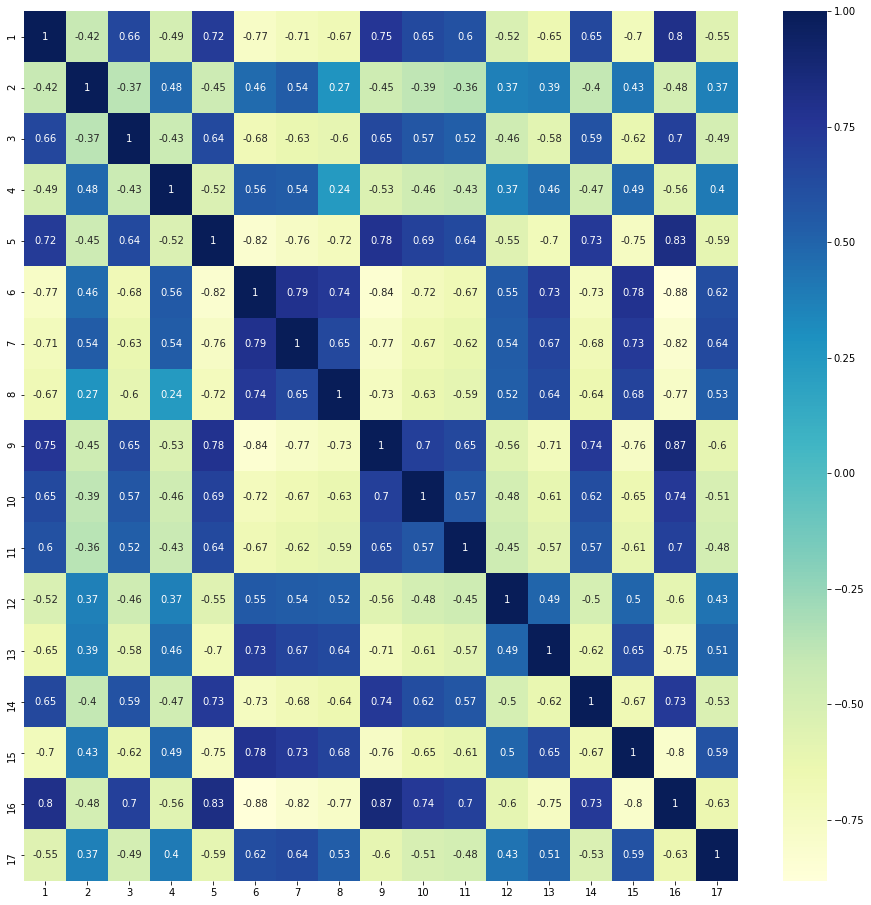

In [17]:
# Dibujo la matriz de correlación
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

In [8]:
# PROBLEMA DE CLASIFICACIÓN Hemos cambiado a clases por números
df["17"].value_counts()

2.0     27452
1.0     24476
3.0     17311
5.0     10984
0.0      7426
4.0      3668
7.0      3297
10.0     2150
8.0      1470
9.0       908
6.0       857
Name: 17, dtype: int64

In [18]:
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,23.0,0.0,6.0,0.0,4.0,0.0,0.0,0.0,2.0,128565.0,15.0,0.0,0.0,4.0,0.0,4498.0,0.0
2,2.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,3.0,46565.0,5.0,0.0,0.0,2.0,0.0,4573.0,0.0
3,32.0,0.0,9.0,0.0,3.0,0.0,0.0,0.0,4.0,124546.0,6.0,0.0,0.0,4.0,0.0,7202.0,0.0
4,14.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,22729.0,8.0,0.0,0.0,2.0,0.0,3398.0,0.0
5,32.0,0.0,9.0,0.0,3.0,0.0,0.0,0.0,2.0,40922.0,7.0,0.0,0.0,4.0,0.0,4407.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,5.0,0.0,10.0
99996,0.0,1.0,0.0,0.0,0.0,2.0,2.0,5.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,5.0
99997,0.0,0.0,0.0,0.0,0.0,2.0,1.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,3.0
99998,0.0,5.0,0.0,1.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,4.0,0.0,1.0


In [12]:
type(df['1'][1])

pandas.core.series.Series

In [19]:
df["1"] = df["1"].apply(lambda x: int(math.floor(x)))
df["2"] = df["2"].apply(lambda x: int(math.floor(x)))
df["3"] = df["3"].apply(lambda x: int(math.floor(x)))
df["4"] = df["4"].apply(lambda x: int(math.floor(x)))
df["5"] = df["5"].apply(lambda x: int(math.floor(x)))
df["6"] = df["6"].apply(lambda x: int(math.floor(x)))
df["7"] = df["7"].apply(lambda x: int(math.floor(x)))
df["8"] = df["8"].apply(lambda x: int(math.floor(x)))
df["10"] = df["10"].apply(lambda x: int(math.floor(x)))
df["12"] = df["12"].apply(lambda x: int(math.floor(x)))
df["13"] = df["13"].apply(lambda x: int(math.floor(x)))
df["14"] = df["14"].apply(lambda x: int(math.floor(x)))
df["15"] = df["15"].apply(lambda x: int(math.floor(x)))
df["16"] = df["16"].apply(lambda x: int(math.floor(x)))
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,23,0,6,0,4,0,0,0,2.0,128565,15.0,0,0,4,0,4498,0.0
2,2,0,5,0,2,0,0,0,3.0,46565,5.0,0,0,2,0,4573,0.0
3,32,0,9,0,3,0,0,0,4.0,124546,6.0,0,0,4,0,7202,0.0
4,14,0,1,0,3,0,0,0,2.0,22729,8.0,0,0,2,0,3398,0.0
5,32,0,9,0,3,0,0,0,2.0,40922,7.0,0,0,4,0,4407,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,1,0,2,2,1,0.0,0,0.0,0,2,0,5,0,10.0
99996,0,1,0,0,0,2,2,5,0.0,0,0.0,2,2,0,2,0,5.0
99997,0,0,0,0,0,2,1,5,0.0,0,0.0,1,1,0,3,0,3.0
99998,0,5,0,1,0,2,3,1,0.0,0,0.0,1,2,0,4,0,1.0


#### 1. Definir X e y

In [20]:
# coger las columnas 1, 3, 5, 9 tiene solo valor ilustrativo, NO LO COPIÉIS
X = np.array(df[['1','5', '6', '7','9','15','16']])
y = np.array(df['17'])
X.shape

(199998, 7)

In [78]:
y.shape

(199998,)

#### 2. Dividir X_train, X_test, y_train, y_test

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [16]:
X_train

array([[6.000e+00, 6.000e+00, 0.000e+00, ..., 2.000e+00, 0.000e+00,
        3.663e+03],
       [1.900e+01, 2.000e+00, 0.000e+00, ..., 3.000e+00, 0.000e+00,
        5.113e+03],
       [0.000e+00, 0.000e+00, 4.000e+00, ..., 0.000e+00, 4.000e+00,
        0.000e+00],
       ...,
       [2.900e+01, 3.000e+00, 0.000e+00, ..., 2.000e+00, 0.000e+00,
        5.389e+03],
       [0.000e+00, 0.000e+00, 2.000e+00, ..., 0.000e+00, 2.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 2.000e+00, ..., 0.000e+00, 6.000e+00,
        0.000e+00]])

#### 3. Asignar el modelo (vacío) a una variable
Aquí meteríais los parámetros

In [ ]:
#################
XGBoost

In [205]:
from xgboost import XGBClassifier 
## modelo XGBoost
model = XGBClassifier() 
model.fit(X_train, y_train) 


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#Make predictions for test data 
y_pred = model.predict(X_test)
y_pred.shape

In [ ]:
model.score(X_test, y_test)

In [ ]:
##################

In [22]:
model = linear_model.LogisticRegression()
# la otra forma, pero lo mismo: model = LogisticRegression()

#### 4. Entrenar el modelo con X_train, y_train

In [23]:
model.fit(X_train, y_train)

LogisticRegression()

#### 5. Predecir con el modelo ya entrenado con X_test/to_pred

In [24]:
predictions = model.predict(X_test)
print(predictions)

[0. 0. 2. ... 2. 2. 1.]


#### 6. Sacar métricas, valorar el modelo 

In [25]:
model.score(X_test,y_test)

0.6386

## Una vez listo el modelo, toca predecir con el dataset de predicción 

In [26]:
to_pred = pd.read_csv("/Users/elsa/Desktop/Bootcamp The Bridge/The_Bridge/Ds_Bootcamp_Elsa/Ejercicios/competicion_kaggle/test_set.csv")

In [27]:
# la primera columna es id_case, deberéis quitarla para hacer la predicción si la habéis quitado para entrenar
# pero guardarla para incluirla en la submission

# IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO
# SI EL ARRAY CON EL QUE HICISTEIS .fit() ERA DE 4 COLUMNAS, PARA .predict() DEBEN SER LAS MISMAS
# SI AL ARRAY CON EL QUE HICISTEIS .fit() LO NORMALIZASTEIS, PARA .predict() DEBÉIS NORMALIZARLO
# TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 133744 FILAS
# SI O SI

to_pred

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,314114,19,a,7,Y,4,gynecology,S,C,2.0,59278,8.0,Emergency,Minor,2,41-50,4778.0
1,208989,15,c,5,Z,3,gynecology,S,F,2.0,102253,15.0,Trauma,Moderate,3,31-40,5734.0
2,305872,17,e,1,X,4,gynecology,R,E,4.0,5828,4.0,Emergency,Minor,3,71-80,5064.0
3,266099,3,c,3,Z,4,TB & Chest disease,R,A,2.0,56642,9.0,Urgent,Extreme,4,31-40,3254.0
4,13228,6,a,6,X,4,gynecology,R,F,1.0,116266,8.0,Emergency,Minor,3,21-30,4639.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133739,318155,18,d,13,Y,6,anesthesia,Q,B,3.0,123269,25.0,Urgent,Minor,4,51-60,5089.0
133740,144850,27,a,7,Y,2,gynecology,S,C,2.0,1293,8.0,Emergency,Moderate,3,61-70,6713.0
133741,180676,16,c,3,Z,3,gynecology,R,A,3.0,112921,5.0,Trauma,Minor,3,31-40,5326.0
133742,39933,28,b,11,X,4,gynecology,R,F,2.0,585,2.0,Trauma,Extreme,2,31-40,7072.0


In [28]:
to_pred.drop("0",1,inplace = True)

In [29]:
# ENCODER:     le =labelencode(). si generamos la variable del label encode luego será más fácil para hacer el inverse
le=LabelEncoder()
to_pred_string = df[1:][df[1:].select_dtypes('object').columns].apply(le.transform)
to_pred_no_string = df[1:][df[1:].select_dtypes(exclude='object').columns]
to_pred = pd. concat([to_pred_no_string,to_pred_string],ignore_index=True)


In [30]:
# para evitar este error ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
to_pred = to_pred.fillna(0)

In [31]:
to_pred

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,3.0,46565.0,5.0,0.0,0.0,2.0,0.0,4573.0,0.0
1,32.0,0.0,9.0,0.0,3.0,0.0,0.0,0.0,4.0,124546.0,6.0,0.0,0.0,4.0,0.0,7202.0,0.0
2,14.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,22729.0,8.0,0.0,0.0,2.0,0.0,3398.0,0.0
3,32.0,0.0,9.0,0.0,3.0,0.0,0.0,0.0,2.0,40922.0,7.0,0.0,0.0,4.0,0.0,4407.0,0.0
4,15.0,0.0,5.0,0.0,2.0,0.0,0.0,0.0,2.0,34827.0,8.0,0.0,0.0,2.0,0.0,5976.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
to_pred["1"] = to_pred["1"].apply(lambda x: int(math.floor(x)))
to_pred["2"] = to_pred["2"].apply(lambda x: int(math.floor(x)))
to_pred["3"] = to_pred["3"].apply(lambda x: int(math.floor(x)))
to_pred["4"] = to_pred["4"].apply(lambda x: int(math.floor(x)))
to_pred["5"] = to_pred["5"].apply(lambda x: int(math.floor(x)))
to_pred["6"] = to_pred["6"].apply(lambda x: int(math.floor(x)))
to_pred["7"] = to_pred["7"].apply(lambda x: int(math.floor(x)))
to_pred["8"] = to_pred["8"].apply(lambda x: int(math.floor(x)))
to_pred["10"] = to_pred["10"].apply(lambda x: int(math.floor(x)))
to_pred["12"] = to_pred["12"].apply(lambda x: int(math.floor(x)))
to_pred["13"] = to_pred["13"].apply(lambda x: int(math.floor(x)))
to_pred["14"] = to_pred["14"].apply(lambda x: int(math.floor(x)))
to_pred["15"] = to_pred["15"].apply(lambda x: int(math.floor(x)))
to_pred["16"] = to_pred["16"].apply(lambda x: int(math.floor(x)))
to_pred

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2,0,5,0,2,0,0,0,3.0,46565,5.0,0,0,2,0,4573,0.0
1,32,0,9,0,3,0,0,0,4.0,124546,6.0,0,0,4,0,7202,0.0
2,14,0,1,0,3,0,0,0,2.0,22729,8.0,0,0,2,0,3398,0.0
3,32,0,9,0,3,0,0,0,2.0,40922,7.0,0,0,4,0,4407,0.0
4,15,0,5,0,2,0,0,0,2.0,34827,8.0,0,0,2,0,5976,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399989,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0
399990,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0
399991,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0
399992,0,0,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0,0.0


In [33]:
predictions_submit = model.predict(to_pred[['1','5', '6', '7','9','15','16']])
predictions_submit

array([0., 0., 0., ..., 2., 2., 2.])

In [36]:
submission = pd.DataFrame({"id": to_pred["0"], "days": predictions_submit})
submission

KeyError: '0'

In [41]:
submission = submission["days"][submission.select_dtypes('integer').columns].apply(LabelEncoder().inverse_transform)
submission


KeyError: 'days'

In [29]:
sample = pd.read_csv("/Users/elsa/Desktop/Bootcamp The Bridge/The_Bridge/Ds_Bootcamp_Elsa/Ejercicios/competicion_kaggle/sample_submission.csv")

In [30]:
sample.shape

(133744, 2)

In [62]:
sample.to_csv('submit0.64.csv',index=False)

In [31]:
if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission.to_csv("to_submit1.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

In [ ]:
predictions_submit_string = to_pred[to_pred.select_dtypes('object').columns].apply(LabelEncoder().inverse_transform)

predictions_submit_no_string = to_pred[to_pred.select_dtypes(exclude='object').columns]
predictions_submit = pd. concat([predictions_submit_no_string,predictions_submit_string],ignore_index=True)
predictions_submit